## 0. import libraries

In [11]:
import unicodedata
import string
import re
import random
import time
import math

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
## using CUDA to speed up training
USE_CUDA = True

## project utils
## basic parameters and pre-processing function 
from preprocess import *
from model import test_model, get_model

## 1. preprocess

In [2]:
voc, pairs = prepare_data('train.article', 'train.title', True)
# Print an example pair
print(random.choice(pairs))

Reading lines...
Read 3803957 sentence pairs
Trimmed to 3803957 sentence pairs
Indexing words...
['publicist says ed mcmahon broke neck last year and is recovering', 'former tonight show sidekick ed mcmahon broke his neck in a fall last year and was recovering after two surgeries his publicist said .']


## 2. test model

In [3]:
test_model()

EncoderRNN (
  (embedding): Embedding(10, 10)
  (gru): GRU(10, 10, num_layers=2)
)
AttnDecoderRNN (
  (embedding): Embedding(10, 10)
  (gru): GRU(20, 10, num_layers=2, dropout=0.1)
  (out): Linear (20 -> 10)
  (attn): Attn (
    (attn): Linear (10 -> 10)
  )
)
torch.Size([1, 10]) torch.Size([2, 1, 10]) torch.Size([1, 1, 3])
torch.Size([1, 10]) torch.Size([2, 1, 10]) torch.Size([1, 1, 3])
torch.Size([1, 10]) torch.Size([2, 1, 10]) torch.Size([1, 1, 3])


## 3. train model

In [4]:
from train import train, as_minutes, time_since

In [5]:
## Get model
encoder,decoder = get_model(voc)
if USE_CUDA:
    encoder.cuda()
    decoder.cuda()

In [6]:
## Initialize optimizers and criterion
learning_rate = 0.0001
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()

In [ ]:
## Train parameters
n_epochs = 200000
plot_every = 20
print_every = 100
## Keep track of time elapsed and running averages
start = time.time()
plot_losses = []
print_loss_total = 0 # Reset every print_every
plot_loss_total = 0 # Reset every plot_every

In [ ]:
## Begin!
for epoch in range(1, n_epochs + 1):
    ## Get training data for this cycle
    training_pair = variables_from_pair(voc,random.choice(pairs))
    input_variable = training_pair[0]
    target_variable = training_pair[1]
    ## Run the train function
    loss = train(input_variable, target_variable, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
    ## Keep track of loss
    print_loss_total += loss
    plot_loss_total += loss
    if epoch == 0: continue
    ## Output summary
    if epoch % print_every == 0:
        print_loss_avg = print_loss_total / print_every
        print_loss_total = 0
        print_summary = '%s (%d %d%%) %.4f' % (time_since(start, epoch / n_epochs), epoch, epoch / n_epochs * 100, print_loss_avg)
        print(print_summary)
    ## Prepare plot data
    if epoch % plot_every == 0:
        plot_loss_avg = plot_loss_total / plot_every
        plot_losses.append(plot_loss_avg)
        plot_loss_total = 0

0m 54s (- 1814m 7s) (100 0%) 9.9448
1m 46s (- 1765m 29s) (200 0%) 7.6416
2m 33s (- 1700m 3s) (300 0%) 6.8301
3m 20s (- 1666m 39s) (400 0%) 6.4543
4m 12s (- 1680m 18s) (500 0%) 7.2631
5m 5s (- 1692m 25s) (600 0%) 7.1292
5m 57s (- 1695m 10s) (700 0%) 6.9417
6m 48s (- 1694m 36s) (800 0%) 6.6859
7m 38s (- 1691m 49s) (900 0%) 6.7487
8m 26s (- 1680m 35s) (1000 0%) 6.3893
9m 18s (- 1681m 48s) (1100 0%) 6.8338
10m 6s (- 1675m 34s) (1200 0%) 6.5057
10m 57s (- 1673m 42s) (1300 0%) 6.5628
11m 47s (- 1671m 53s) (1400 0%) 6.4514
12m 35s (- 1666m 16s) (1500 0%) 6.3850
13m 24s (- 1663m 21s) (1600 0%) 6.5334
14m 14s (- 1662m 0s) (1700 0%) 6.6962
15m 1s (- 1653m 59s) (1800 0%) 6.4381
15m 50s (- 1652m 25s) (1900 0%) 6.4212
16m 38s (- 1648m 12s) (2000 1%) 6.3602
17m 28s (- 1646m 22s) (2100 1%) 6.3062
18m 16s (- 1642m 26s) (2200 1%) 5.9279
19m 4s (- 1640m 2s) (2300 1%) 6.2507
19m 51s (- 1635m 18s) (2400 1%) 6.3370
20m 42s (- 1636m 29s) (2500 1%) 6.5455
21m 32s (- 1635m 17s) (2600 1%) 6.2753
22m 20s (- 163

172m 17s (- 1445m 31s) (21300 10%) 5.8590
173m 9s (- 1445m 9s) (21400 10%) 5.8221
174m 2s (- 1444m 52s) (21500 10%) 5.9505
174m 50s (- 1444m 2s) (21600 10%) 5.4545
175m 38s (- 1443m 11s) (21700 10%) 5.6515
176m 29s (- 1442m 45s) (21800 10%) 5.7593
177m 23s (- 1442m 34s) (21900 10%) 5.8204
178m 13s (- 1442m 0s) (22000 11%) 5.8048
179m 1s (- 1441m 10s) (22100 11%) 5.7737
179m 50s (- 1440m 22s) (22200 11%) 5.6465
180m 39s (- 1439m 37s) (22300 11%) 6.0319
181m 28s (- 1438m 53s) (22400 11%) 5.7139
182m 18s (- 1438m 15s) (22500 11%) 5.8357
183m 6s (- 1437m 16s) (22600 11%) 5.6718
183m 53s (- 1436m 16s) (22700 11%) 5.6682
184m 40s (- 1435m 17s) (22800 11%) 5.4906
185m 24s (- 1433m 55s) (22900 11%) 5.5777
186m 10s (- 1432m 41s) (23000 11%) 5.5442
186m 55s (- 1431m 27s) (23100 11%) 5.4012
187m 42s (- 1430m 24s) (23200 11%) 5.5380
188m 28s (- 1429m 16s) (23300 11%) 5.6120
189m 13s (- 1428m 6s) (23400 11%) 5.3529
190m 1s (- 1427m 14s) (23500 11%) 5.7388
190m 47s (- 1426m 5s) (23600 11%) 5.7456
19

400m 36s (- 1221m 17s) (49400 24%) 5.5591
401m 24s (- 1220m 26s) (49500 24%) 5.6456
402m 11s (- 1219m 32s) (49600 24%) 5.3761
402m 58s (- 1218m 40s) (49700 24%) 5.3870
403m 48s (- 1217m 53s) (49800 24%) 5.6273
404m 35s (- 1217m 0s) (49900 24%) 5.5534
405m 22s (- 1216m 7s) (50000 25%) 5.4866
406m 12s (- 1215m 21s) (50100 25%) 5.4265
406m 57s (- 1214m 23s) (50200 25%) 5.4237
407m 44s (- 1213m 30s) (50300 25%) 5.3760
408m 33s (- 1212m 41s) (50400 25%) 5.4382
409m 20s (- 1211m 47s) (50500 25%) 5.4408
410m 5s (- 1210m 49s) (50600 25%) 5.3250
410m 54s (- 1210m 0s) (50700 25%) 5.4094
411m 42s (- 1209m 10s) (50800 25%) 5.5795
412m 28s (- 1208m 16s) (50900 25%) 5.7942
413m 17s (- 1207m 28s) (51000 25%) 5.3470
414m 5s (- 1206m 36s) (51100 25%) 5.4384
414m 49s (- 1205m 35s) (51200 25%) 5.3224
415m 37s (- 1204m 44s) (51300 25%) 5.2295
416m 24s (- 1203m 50s) (51400 25%) 5.4523
417m 11s (- 1202m 59s) (51500 25%) 5.2734
417m 59s (- 1202m 8s) (51600 25%) 5.5282
418m 50s (- 1201m 25s) (51700 25%) 5.421

618m 38s (- 1007m 13s) (76100 38%) 5.3698
619m 30s (- 1006m 29s) (76200 38%) 5.2932
620m 18s (- 1005m 40s) (76300 38%) 5.4361
621m 9s (- 1004m 55s) (76400 38%) 5.2512
621m 58s (- 1004m 6s) (76500 38%) 5.2713
622m 48s (- 1003m 18s) (76600 38%) 5.4797
623m 36s (- 1002m 29s) (76700 38%) 5.2510
624m 28s (- 1001m 45s) (76800 38%) 5.2169
625m 18s (- 1000m 58s) (76900 38%) 5.4283
626m 9s (- 1000m 14s) (77000 38%) 5.6280
627m 0s (- 999m 27s) (77100 38%) 5.3981
627m 49s (- 998m 40s) (77200 38%) 5.2792
628m 40s (- 997m 55s) (77300 38%) 5.5988
629m 31s (- 997m 9s) (77400 38%) 5.3298
630m 22s (- 996m 24s) (77500 38%) 5.3722
631m 14s (- 995m 40s) (77600 38%) 5.2446
632m 1s (- 994m 48s) (77700 38%) 5.4895
632m 48s (- 993m 56s) (77800 38%) 5.1855
633m 34s (- 993m 4s) (77900 38%) 5.1366
634m 23s (- 992m 14s) (78000 39%) 5.3204
635m 9s (- 991m 21s) (78100 39%) 5.3683
635m 53s (- 990m 26s) (78200 39%) 5.0215
636m 40s (- 989m 34s) (78300 39%) 5.5376
637m 28s (- 988m 44s) (78400 39%) 5.3263
638m 17s (- 98

958m 34s (- 663m 23s) (118200 59%) 5.2915
959m 26s (- 662m 36s) (118300 59%) 5.2407
960m 12s (- 661m 45s) (118400 59%) 5.0015
960m 59s (- 660m 56s) (118500 59%) 5.1696
961m 46s (- 660m 6s) (118600 59%) 5.1425
962m 33s (- 659m 16s) (118700 59%) 4.8058
963m 18s (- 658m 25s) (118800 59%) 5.0556
964m 6s (- 657m 36s) (118900 59%) 5.4825
964m 55s (- 656m 47s) (119000 59%) 5.2131
965m 43s (- 655m 58s) (119100 59%) 5.1878
966m 31s (- 655m 9s) (119200 59%) 5.1600
967m 22s (- 654m 22s) (119300 59%) 5.1574
968m 12s (- 653m 35s) (119400 59%) 5.1745
969m 3s (- 652m 47s) (119500 59%) 4.9561
969m 55s (- 652m 1s) (119600 59%) 5.3033
970m 47s (- 651m 14s) (119700 59%) 5.2691
971m 38s (- 650m 28s) (119800 59%) 5.0916
972m 28s (- 649m 39s) (119900 59%) 5.2907
973m 17s (- 648m 51s) (120000 60%) 5.3767
974m 8s (- 648m 4s) (120100 60%) 5.1844
974m 58s (- 647m 16s) (120200 60%) 5.2041
975m 46s (- 646m 27s) (120300 60%) 4.8312
976m 35s (- 645m 39s) (120400 60%) 5.4536
977m 26s (- 644m 51s) (120500 60%) 5.3925

1163m 55s (- 459m 24s) (143400 71%) 5.2524
1164m 42s (- 458m 34s) (143500 71%) 5.3424
1165m 29s (- 457m 45s) (143600 71%) 5.1171
1166m 15s (- 456m 55s) (143700 71%) 5.2150
1167m 2s (- 456m 6s) (143800 71%) 5.0825
1167m 49s (- 455m 17s) (143900 71%) 5.3911
1168m 36s (- 454m 27s) (144000 72%) 5.2806
1169m 22s (- 453m 37s) (144100 72%) 5.0468
1170m 10s (- 452m 48s) (144200 72%) 5.2335
1170m 58s (- 452m 0s) (144300 72%) 5.1999
1171m 48s (- 451m 11s) (144400 72%) 5.2424
1172m 35s (- 450m 22s) (144500 72%) 5.2784
1173m 22s (- 449m 33s) (144600 72%) 5.0240
1179m 37s (- 442m 58s) (145400 72%) 5.0233
1180m 25s (- 442m 9s) (145500 72%) 5.0894
1181m 12s (- 441m 19s) (145600 72%) 5.1210
1182m 0s (- 440m 30s) (145700 72%) 5.3467
1182m 47s (- 439m 41s) (145800 72%) 5.0562
1183m 32s (- 438m 51s) (145900 72%) 5.1365
1184m 20s (- 438m 2s) (146000 73%) 5.2131
1185m 9s (- 437m 14s) (146100 73%) 5.0458
1185m 59s (- 436m 25s) (146200 73%) 5.0168
1186m 51s (- 435m 38s) (146300 73%) 5.4188
1187m 41s (- 434m 

### save model

In [ ]:
encoder_path = './model/encoder_giga_20w_epoch.model'
decoder_path = './model/decoder_giga_20w_epoch.model'
torch.save(encoder, encoder_path)
torch.save(decoder, decoder_path)
# encoder = torch.load(encoder_path)
# decoder = torch.load(decoder_path)

### show learning curve

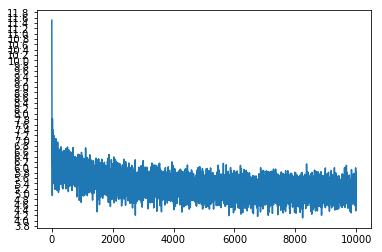

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
%matplotlib inline

def show_plot(points):
    plt.figure()
    fig, ax = plt.subplots()
    loc = ticker.MultipleLocator(base=0.2) # put ticks at regular intervals
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

show_plot(plot_losses)

## 4. evaluate

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
%matplotlib inline
from utils import evaluate_randomly

In [14]:
evaluate_randomly(encoder, decoder, voc, pairs)

> white house say it s too soon to say who killed usaid official
= the white house on tuesday praised jordan s excellent cooperation in the hunt for who killed a us diplomat but said it was too early to link the slaying to terrorism .
< the white house said thursday that the the the a the the the the the the the the the the . the the . . <EOS>



## 5. show attention

In [15]:
from utils import evaluate_and_show_attention

In [16]:
sentence = "a south korean lawmaker said friday communist north korea could be producing plutonium and could have more secret underground nuclear facilities than already feared ."

input = a south korean lawmaker said friday communist north korea could be producing plutonium and could have more secret underground nuclear facilities than already feared .
output = south korean president roh moo hyun to a a nuclear the the the the a the the the the the the the the the <EOS>


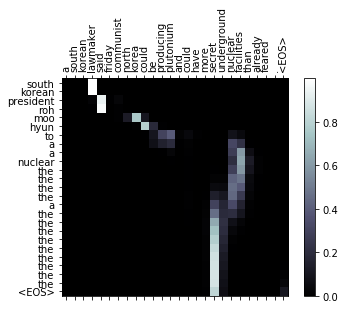

In [17]:
evaluate_and_show_attention(encoder, decoder, voc, sentence)

## 6. generate result on test set

In [18]:
from utils import generate_result

In [19]:
ref_file = './data/extractive_ouput/testsvr2_output.txt'
res_file = './data/abstractive_output/testsvr2_giga_result.txt'
generate_result(encoder, decoder, voc, ref_file, res_file)

### calculate ROUGE score

In [21]:
from evaluation import evaluate_rouge_scores

In [23]:
evaluate_rouge_scores(res_file)

38 entries...
38 entries are used for evaluation.


{'ROUGE-1': 0.0245, 'ROUGE-2': 0.0, 'ROUGE-SU4': 0.00545}